In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from tensorflow.keras.layers import BatchNormalization

In [26]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

!unzip dataset-name.zip -d dataset

Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants
License(s): copyright-authors
zomato-bangalore-restaurants.zip: Skipping, found more recently modified local copy (use --force to force download)
unzip:  cannot find or open dataset-name.zip, dataset-name.zip.zip or dataset-name.zip.ZIP.


In [27]:
df = pd.read_csv('/content/zomato-bangalore-restaurants.zip')

In [28]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [30]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [31]:
df.shape

(51717, 17)

In [32]:
duplicates_before = df.duplicated().sum()
df.drop_duplicates(inplace=True)
duplicates_after = df.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicates_before}")
print(f"Number of duplicate rows after dropping: {duplicates_after}")

Number of duplicate rows before dropping: 0
Number of duplicate rows after dropping: 0


In [33]:
df.isnull().sum()

,0
url,0
address,0
name,0
online_order,0
book_table,0
rate,7775
votes,0
phone,1208
location,21
rest_type,227


In [34]:
print(df.columns)

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')


In [35]:
X = df.drop("rate", axis=1)
y = df["rate"]

In [36]:
cols_to_check = ['location', 'cuisines', 'listed_in(type)', 'online_order', 'book_table']
for col in cols_to_check:
    if col in df.columns:
        print(f"{col} - unique values:", df[col].nunique())
        print(df[col].value_counts().head(10))
        print("-" * 50)

location - unique values: 93
location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Name: count, dtype: int64
--------------------------------------------------
cuisines - unique values: 2723
cuisines
North Indian                           2913
North Indian, Chinese                  2385
South Indian                           1828
Biryani                                 918
Bakery, Desserts                        911
Fast Food                               803
Desserts                                766
Cafe                                    756
South Indian, North Indian, Chinese     726
Bakery                                  651
Name: count, dtype: int64
--------------------------------------------------
listed_in(type) - unique val

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna('Unknown', inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-2384501307.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)
/tmp/ipython-input-2384501307.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [40]:
if 'rate' in df.columns:
    df['rate'] = df['rate'].astype(str).str.split('/').str[0]
    df['rate'] = df['rate'].replace(['NEW', '-', 'nan'], '0')
    df['rate'] = pd.to_numeric(df['rate'], errors='coerce').fillna(0)

if 'approx_cost(for two people)' in df.columns:
    df.rename(columns={'approx_cost(for two people)': 'cost2'}, inplace=True)
    df['cost2'] = df['cost2'].astype(str).str.replace(',', '')
    df['cost2'] = pd.to_numeric(df['cost2'], errors='coerce').fillna(df['cost2'].median())



In [41]:
# Function to handle outliers using IQR
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))


In [42]:
print(df.isnull().sum())

url                0
address            0
name               0
online_order       0
book_table         0
rate               0
votes              0
phone              0
location           0
rest_type          0
dish_liked         0
cuisines           0
cost2              0
reviews_list       0
menu_item          0
listed_in(type)    0
listed_in(city)    0
dtype: int64


In [43]:
for col in df.columns:
    if df[col].nunique() <= 1:
        print(f"Column '{col}' has only one unique value.")


In [44]:
if 'location' in df.columns:
    top_location = df['location'].value_counts().idxmax()
    print("Top location with most restaurants:", top_location)

if 'listed_in(type)' in df.columns:
    top_type = df.groupby('listed_in(type)')['rate'].mean().idxmax()
    print("Top restaurant type by average rating:", top_type)

if 'cuisines' in df.columns:
    top_cuisine = df['cuisines'].value_counts().idxmax()
    print("Most common cuisine:", top_cuisine)


Top location with most restaurants: BTM
Top restaurant type by average rating: Buffet
Most common cuisine: North Indian


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set_palette('viridis')

combo_availability = df.groupby(['online_order', 'book_table']).size().reset_index(name='count')
print("\nMost common combinations of Online Order & Table Booking availability:")
print(combo_availability.sort_values(by='count', ascending=False))



Most common combinations of Online Order & Table Booking availability:
  online_order book_table  count
2          Yes         No  26639
0           No         No  18629
3          Yes        Yes   3805
1           No        Yes   2644


In [85]:
online_order_counts = df['online_order'].value_counts(normalize=True) * 100
print("\nPercentage of restaurants offering Online Order:")
print(online_order_counts)




Percentage of restaurants offering Online Order:
online_order
1    58.866524
0    41.133476
Name: proportion, dtype: float64


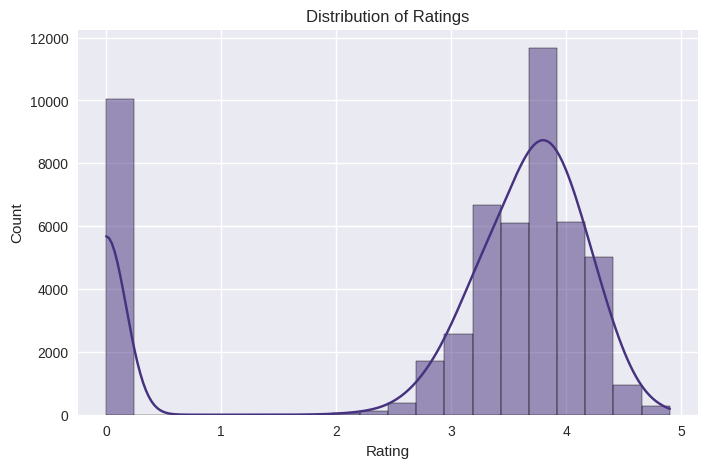

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(df['rate'], bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


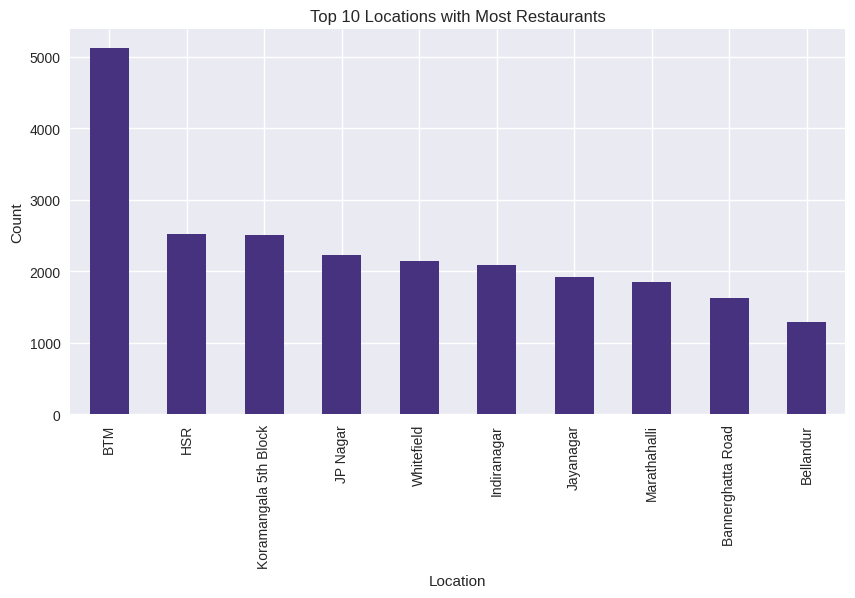

In [48]:
if 'location' in df.columns:
    plt.figure(figsize=(10,5))
    df['location'].value_counts().head(10).plot(kind='bar')
    plt.title("Top 10 Locations with Most Restaurants")
    plt.xlabel("Location")
    plt.ylabel("Count")
    plt.show()


/tmp/ipython-input-1300644068.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='listed_in(type)', y='rate', data=df, ci=None)


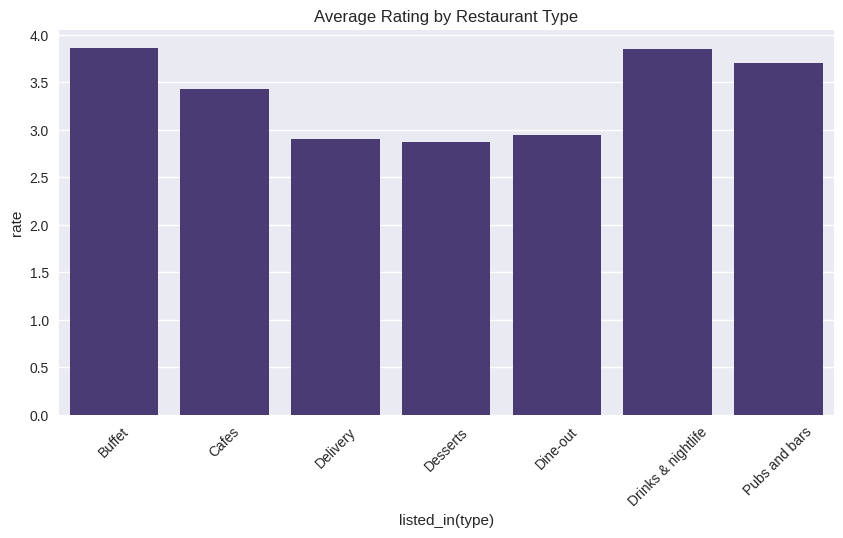

In [47]:
if 'listed_in(type)' in df.columns:
    plt.figure(figsize=(10,5))
    sns.barplot(x='listed_in(type)', y='rate', data=df, ci=None)
    plt.title("Average Rating by Restaurant Type")
    plt.xticks(rotation=45)
    plt.show()


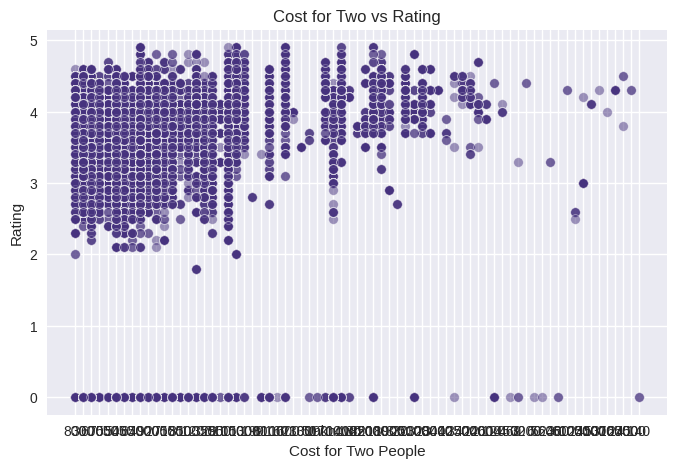

In [49]:
if 'cost2' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='cost2', y='rate', data=df, alpha=0.5)
    plt.title("Cost for Two vs Rating")
    plt.xlabel("Cost for Two People")
    plt.ylabel("Rating")
    plt.show()


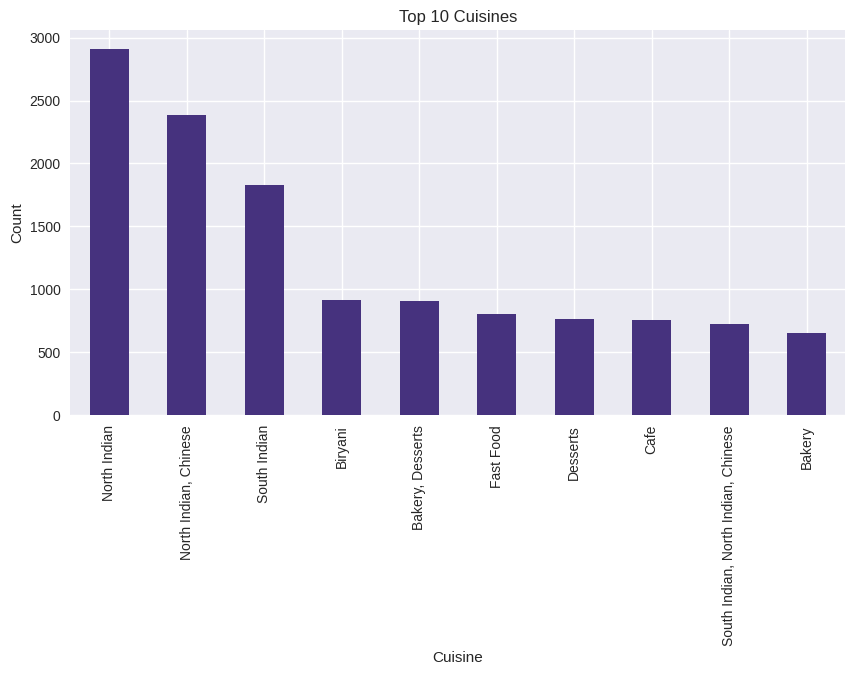

In [50]:
if 'cuisines' in df.columns:
    plt.figure(figsize=(10,5))
    df['cuisines'].value_counts().head(10).plot(kind='bar')
    plt.title("Top 10 Cuisines")
    plt.xlabel("Cuisine")
    plt.ylabel("Count")
    plt.show()

In [51]:
if 'cost2' not in df.columns and 'approx_cost(for two people)' in df.columns:
    df.rename(columns={'approx_cost(for two people)': 'cost2'}, inplace=True)
elif 'cost2' not in df.columns:
    df['cost2'] = 0

if 'votes' not in df.columns:
    df['votes'] = 0

if 'cuisines' not in df.columns:
    df['cuisines'] = 'Unknown'

if 'cuisine_main' not in df.columns:
    df['cuisines'] = df['cuisines'].astype(str)
    df['cuisine_main'] = df['cuisines'].apply(
        lambda x: x.split(',')[0].strip() if x.strip() != '' else 'Unknown'
    )
for col in ['location', 'online_order', 'book_table', 'listed_in(type)']:
    if col not in df.columns:
        df[col] = 'Unknown'

In [52]:
df['cost2'] = df['cost2'].astype(str).str.replace(',', '', regex=False)
df['cost2'] = pd.to_numeric(df['cost2'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')


In [53]:
df['cost2'] = df['cost2'].fillna(df['cost2'].median())
df['votes'] = df['votes'].fillna(0)


In [54]:
def categorize_rating(r):
    if r < 3.5:
        return 'Low'
    elif r <= 4.2:
        return 'Medium'
    else:
        return 'High'

y = df['rate'].apply(categorize_rating)


In [55]:
features = ['cost2', 'votes', 'location', 'cuisine_main', 'online_order', 'book_table', 'listed_in(type)']
X = df[features].copy()


In [56]:
cat_cols = ['location', 'cuisine_main', 'online_order', 'book_table', 'listed_in(type)']
X[cat_cols] = X[cat_cols].fillna('Unknown')


In [57]:
encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))
    encoders[col] = le


In [58]:
scaler = StandardScaler()
X[['cost2', 'votes']] = scaler.fit_transform(X[['cost2', 'votes']])


In [59]:
le_target = LabelEncoder()
y_enc = le_target.fit_transform(y)


In [86]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X, y)
imps = pd.Series(rf.feature_importances_, index=(X.columns if hasattr(X, 'columns') else range(X.shape[1])))
imps_sorted = imps.sort_values(ascending=False)
# choose top features: cumulative importance >= 0.95 or at least top 8
cum = imps_sorted.cumsum()
top_feats = cum[cum <= 0.95].index.tolist()
if len(top_feats) < 8:
    top_feats = imps_sorted.index[:8].tolist()
print("Selected features (count):", len(top_feats))

# reduce X
X_sel = X[top_feats] if hasattr(X, 'columns') else X[:, list(top_feats)]


Selected features (count): 7


In [60]:
# Encode categorical columns
cat_cols = ['online_order', 'book_table', 'location', 'rest_type', 'cuisines', 'listed_in(type)', 'listed_in(city)']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])


In [61]:
# Scaling numeric features
scaler = StandardScaler()


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, stratify=y_enc, random_state=42
)


In [63]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier())
])


In [64]:
params = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 5, 10],
    'model__min_samples_split': [2, 5]
}

grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best accuracy:", grid.best_score_)




Best params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best accuracy: 0.9398641542282563


In [65]:
best_model = grid.best_estimator_

In [66]:
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Best Parameters:", grid.best_params_)


Accuracy: 94.50889404485692
Best Parameters: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [67]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [68]:
model = LogisticRegression(max_iter=1000, C=2, solver='lbfgs')
model.fit(X_train, y_train)


LogisticRegression(C=2, max_iter=1000)

In [69]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc*100:.2f}%")


Accuracy: 71.33%


In [70]:
y_test_int = y_test.astype(int)
y_pred_int = y_pred.astype(int)

cm = confusion_matrix(y_test_int, y_pred_int)
print("Accuracy: ", accuracy_score(y_test_int, y_pred_int))
print("Precision: ", precision_score(y_test_int, y_pred_int, average='weighted'))
print("Recall: ", recall_score(y_test_int, y_pred_int, average='weighted'))
print("F1 Score: ", f1_score(y_test_int, y_pred_int, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test_int, y_pred_int))

Accuracy:  0.7132637277648879
Precision:  0.7149680701569499
Recall:  0.7132637277648879
F1 Score:  0.7058067733910146

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.33      0.45       817
           1       0.69      0.84      0.76      4311
           2       0.74      0.67      0.70      5216

    accuracy                           0.71     10344
   macro avg       0.71      0.61      0.64     10344
weighted avg       0.71      0.71      0.71     10344



In [71]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)


In [72]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)


In [73]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [07:07:44] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [74]:
print(f"Logistic Regression Accuracy: {acc_log:.4f}")
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"XGBoost Accuracy: {acc_xgb:.4f}")


Logistic Regression Accuracy: 0.7129
Random Forest Accuracy: 0.9450
XGBoost Accuracy: 0.8908


In [75]:
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


In [76]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [77]:
from tensorflow.keras.layers import Dropout
model.add(Dropout(0.3))


In [78]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [80]:
model = Sequential()

In [87]:
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [88]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [89]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [94]:
history = model.fit(
    X_train, y_train_cat,
    epochs=200,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/200
518/518 ━━━━━━━━━━━━━━━━━━━━ 39s 76ms/step - accuracy: 0.7743 - loss: 0.5012 - val_accuracy: 0.7587 - val_loss: 0.5321
Epoch 2/200
518/518 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.7770 - loss: 0.5012 - val_accuracy: 0.7660 - val_loss: 0.5120
Epoch 3/200
518/518 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.7774 - loss: 0.4943 - val_accuracy: 0.7797 - val_loss: 0.4929
Epoch 4/200
518/518 ━━━━━━━━━━━━━━━━━━━━ 19s 28ms/step - accuracy: 0.7802 - loss: 0.4892 - val_accuracy: 0.7791 - val_loss: 0.4859
Epoch 5/200
518/518 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7791 - loss: 0.4835 - val_accuracy: 0.7549 - val_loss: 0.5348
Epoch 6/200
518/518 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - accuracy: 0.7817 - loss: 0.4861 - val_accuracy: 0.7861 - val_loss: 0.4700
Epoch 7/200
518/518 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - accuracy: 0.7849 - loss: 0.4752 - val_accuracy: 0.7836 - val_loss: 0.4774
Epoch 8/200
518/518 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.7872 - loss: 0

In [96]:
loss, acc_nn = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Neural Network Accuracy: {acc_nn:.4f}")

accuracies = {
    "Logistic Regression": acc_log,
    "Random Forest": acc_rf,
    "XGBoost": acc_xgb,
    "Neural Network": acc_nn
}


Neural Network Accuracy: 0.8687


In [97]:
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"\nBest model is: {best_model_name} with accuracy: {best_accuracy:.4f}")


Best model is: Random Forest with accuracy: 0.9450


In [98]:
import pickle
import pandas as pd

# Save best ML model (Random Forest)
with open("best_model.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save Neural Network model
with open("nn_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Create 2% sample of the data
sample = df.sample(frac=0.02, random_state=42)
sample.to_csv("zomato_sample.csv", index=False)

print("Files saved successfully")
print("Sample size:", sample.shape)

Files saved successfully
Sample size: (1034, 18)
